# Mall Customer Segmentation

-----

Table of Contents
- What-Why-How Customer Segmentation?
- Define the step of Data Exploration Analysis.
- Prediction Model
- Conclusion

-----

## What-Why-How Customer Segmentation?

### What is Customer Segmentation?

Customer Segmentation is the process that use features in the specific data to divide the customer into groups. For marketing perspective, Customer Segmentation will help marketer to see thier customer clearly and to communicate the message with each group of customer accurately. For example, Google divides searching customer into three segments which are free search users, free content provider, and paid advertiser. 

### Why segment customers?

There are a lot of benefit of customer segmentation:
- Create the right message to right customers.
- Identyfy the gap to create opportunities
- Focus on the profitable customers

### How to segment customers?

Customer segmentation will use the process:
- Face-to-face or telephone interviews
- Surveys
- Focus groups

-----

## Define the step of Data Exploration Analysis.

There are seven steps in Data Exploration Analysis:
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

For this dataset, we already have full values, no outlier, no additional variable. we skipped the step 4,5,6,7 and go to prediction model directly.

The step for this dataset are:
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis

### 1) Variable Identification

Identify Predictor (Input) and Target (Output)

In [2]:
# We need the basic of library to explore the Predictor (Input)
# import the library that use in data analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [3]:
# import the csv format file into pandas dataframe

df = pd.read_csv('Mall_Customers.csv')

# delete blank space in columns

df  = df.rename(columns=lambda x: x.strip())

In [4]:
# explore the basic information
df.info()
# This dataset is 200 rows for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# explore the data type of each columns
df.dtypes
# There are four integer columns and one object column.

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# explore the name of each columns
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
# explore the actual table
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# explore the basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Describe each variable:
- CustomerID: The data show that it have 200 customer IDs.
- Gender: The data have male and female.
- Age: The data age range is 18-70.
- Annual Income(k$): The data annual income is between 15-137 thousand dollars.
- Spending Score(1-100): The data spending score is between 1-99.

From exploring Predictor (Input), the goal of this data set is using dataset to create segmentation. We decide to use KMeans to calculate output.

### 2) Univariate Analysis

Explore variables one by one.

In [21]:
# explore the number of unique value for each columns
print('The number of unique value for each columns:')
for index in df.columns:
    print(str(index) + ' : {}'.format(df[index].nunique()))

The number of unique value for each columns:
CustomerID : 200
Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84
kmeans : 5


In [10]:
# explore the unique value for each columns
print('Unique value for each columns:'+'\n')
for index in df.columns:
    print(str(index) + ' : {}\n'.format(sorted((df[index].unique().tolist()))))

Unique value for each columns:

CustomerID : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]

Gender : ['Female', 'Male']

Age : [18, 19, 20, 21, 22, 23, 2

Visualize distribution of each variable

In [11]:
# setting style of graph
sns.set_style('whitegrid')
sns.set_palette('summer')

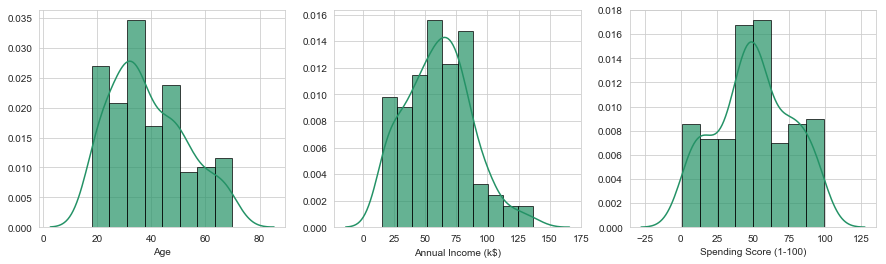

In [22]:
# plot the histrogram of data
distplot = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

fig.subplots_adjust(hspace=0.2)

for ax, plot in zip(axes.flatten(),distplot):
    sns.distplot(df[plot], ax=ax,hist_kws={'edgecolor':'black','alpha':.70})

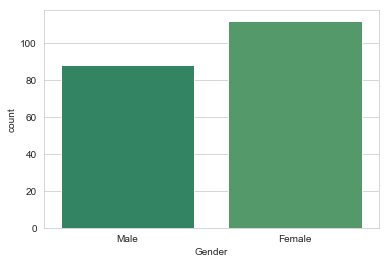

In [13]:
# plot the nominal data
sns.countplot(df['Gender'])

### 3) Bi-variate Analysis

Explore overall correlated

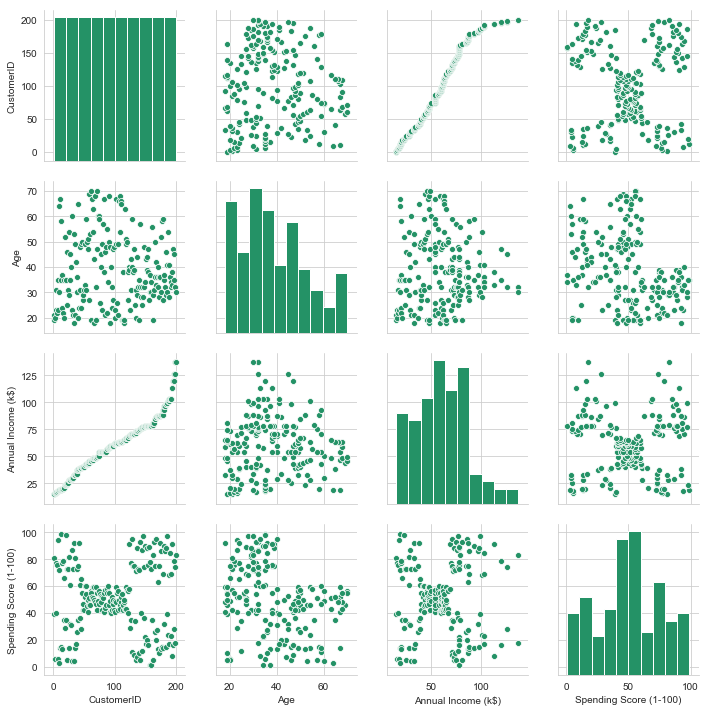

In [14]:
# Explore the correlated between variable
sns.pairplot(df)
# There are some relationship between Annual Income and Spending Score. 
# They are clustering in five segments.

-----

## Prediction Model

The Annual Income and Spending Score form shape of cluster. We use kmeans algorithms to segment the data.

In [15]:
# Create kmeans object

from sklearn.cluster import KMeans
X = df[['Annual Income (k$)','Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [16]:
# See the result of model

kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [17]:
df_kmeans = pd.DataFrame(kmeans.labels_, columns=['kmeans'])
df_kmeans.head(3)

,kmeans
0,4
1,3
2,4


In [18]:
df = df.join(df_kmeans)

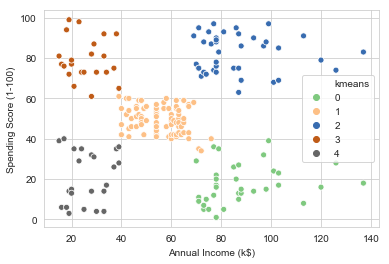

In [19]:
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=df,hue='kmeans',
                legend='full',
                palette='Accent')

In [20]:
kmeans.cluster_centers_.tolist()
for result,i in zip(kmeans.cluster_centers_.tolist(),range(0,5)):
        print('Center of cluster: {}'.format(i))
        print('Annual Income: {:.2f} \nSpending Score: {:.2f}\n'.format(result[0],result[1]))

Center of cluster: 0
Annual Income: 88.20 
Spending Score: 17.11

Center of cluster: 1
Annual Income: 55.30 
Spending Score: 49.52

Center of cluster: 2
Annual Income: 86.54 
Spending Score: 82.13

Center of cluster: 3
Annual Income: 25.73 
Spending Score: 79.36

Center of cluster: 4
Annual Income: 26.30 
Spending Score: 20.91



From the scatter graph, we found that there are five significant segments in this dataset which have center of cluster above cells.

-----

## Conclusion

From dataset that we have, we use the Annual Income and Spending Score to segment the customer. There are five segments that we found from this dataset.